In [24]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

# 주파수 응답과 위상 지연 데이터를 함수로 정의
def gain(f):
    if f == 1000:
        return 280
    elif f == 2000:
        return 220
    # 고조파가 추가될 경우 여기서 이득을 정의할 수 있습니다.
    return 1

def phase_lag(f):
    if f == 1000:
        return 0
    elif f == 2000:
        return 20 * (np.pi / 180)  # degrees to radians
    # 고조파가 추가될 경우 여기서 위상 지연을 정의할 수 있습니다.
    return 0

# 사각파 생성
def square_wave(t, f):
    return (4 / np.pi) * np.sum([np.sin(2 * np.pi * (2*n-1) * f * t) / (2*n-1) for n in range(1, 10)], axis=0)

# 시간 설정
fs = 100000  # 샘플링 주파수
T = 0.002    # 신호 지속 시간
t = np.linspace(0, T, int(fs*T), endpoint=False)

# 입력 사각파 생성
f1 = 1000  # 기본 주파수
input_signal = square_wave(t, f1)

# 출력 신호 계산
output_signal = np.zeros_like(t)
for harmonic in [1, 2]:  # 1000 Hz와 2000 Hz 성분을 고려
    #print('harmonic: ', harmonic) # o1: 1 , o2: 2
    f_h = harmonic * f1
    g = gain(f_h)
    phi = phase_lag(f_h)
    output_signal += g * (4 / np.pi) * np.sin(2 * np.pi * f_h * t + phi) / harmonic



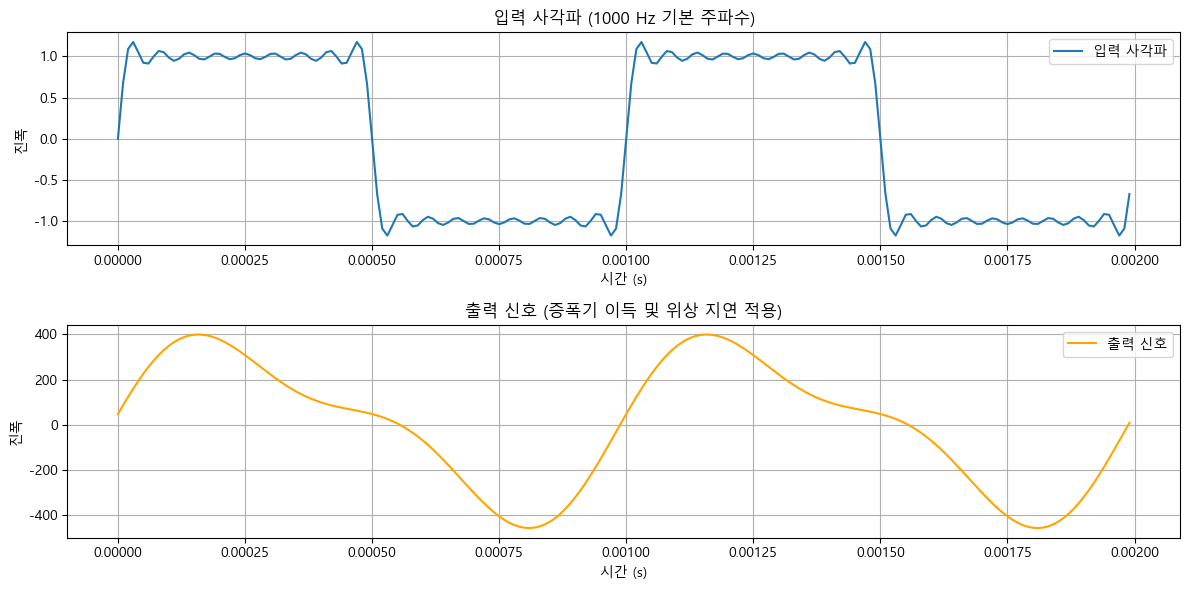

In [21]:
# 시각화
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(t, input_signal, label='입력 사각파')
plt.title('입력 사각파 (1000 Hz 기본 주파수)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, output_signal, label='출력 신호', color='orange')
plt.title('출력 신호 (증폭기 이득 및 위상 지연 적용)')
plt.xlabel('시간 (s)')
plt.ylabel('진폭')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
